<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>GUZMAN, Nicole Anne R.<br>
    201811839 <br>
  58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

Ms. Beba Ng have the monthly sales data from last year that is spread to each donut flavor. Ms. Beba Ng wanted to know the following:
<br>
* What are the monthly revenues, cost, and profits?
* How much profit did she get from each flavor?<br>
* The top 3 and bottom 3 flavors<br>
* If there is anything she could do to improve on marketing and advertising since there are big dips in the sales

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)

df_prices ## Data came from bebang prices.csv

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [3]:
df_sales ## Data came from bebang sales.csv

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

The code block below is where the data from the `.csv` files will be vectorized.
<br>
<br>The `sales_mat` array is where the monthly sales for each flavor is stored, it has an array size of `(12, 12)` and the data on it came form `bebang sales.csv`.
<br>
<br> On  the other hand, the `prices_mat` and `costs_mat` arrays both have their data originated from the `bebang prices.csv` and reshaped their array into `(12, 1)` using the `.reshape()` function.

In [4]:
import numpy as np

### Vectorizing the data
sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0].reshape((12, 1))           
costs_mat = np.array(df_prices)[1].reshape((12,1))                         
    ## .reshape() -- reshapes the array according to the parameter

## Printing the shapes of each vectorized data
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [5]:
## A function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
                 
    monthly_revenue = np.dot(np.transpose(prices_mat),sales_mat)
    monthly_costs = np.dot(np.transpose(costs_mat),sales_mat)
    monthly_profits = monthly_revenue-monthly_costs
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()
        ## .flatten() -- return a copy of array collapsed into one dimension

The code block above is where the computation for the monthly revenue, costs, and profits takes place.
<br>
<br>The computation for the `monthly_revenue` is the dot product of the arrays `prices_mat` and `sales_math` which both come from vectorizing data, the `prices_mat` used the `transpose` function to make the dot product operation possible.
<br>
<br> The computation for the `monthly_costs` on the other hand, has similar process with the computation for the `monthly_revenue`,but instead of using the prices of each product, the `costs_mat` (which contains the cost of each donuts) is multiplied to the `sales_mat` that calculates the `monthly_costs`.
<br>
<br>For the computation of the `monthly_profits`, the ` monthly_costs` is simply subtracted to the `monthly_reenue` as the formula suggested. 

In [6]:
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)

In [7]:
## Printing the Monthly Revenue, Monthly Cost, and Monthly Profit
print(f'Beba Ngs Donuts Monthly Revenue(January-December):\n', month_rev)
print(f'\nBeba Ngs Donuts Monthly Cost(January-December):\n', month_cost)
print(f'\nBeba Ngs Donuts Monthly Profit(January-December):\n', month_profit)

Beba Ngs Donuts Monthly Revenue(January-December):
 [236825 175530 159045  30335 150085  16735  17970  16995  14960  21590
 213655 347365]

Beba Ngs Donuts Monthly Cost(January-December):
 [157454 116322 105195  20334  97261  11208  12372  11497   9926  14377
 137107 230209]

Beba Ngs Donuts Monthly Profit(January-December):
 [ 79371  59208  53850  10001  52824   5527   5598   5498   5034   7213
  76548 117156]


<br>The ouput is displayed in an array with a shape of `(1, 12)`-, this indicates the computation for each 12 months.

## Part 2: Flavor Sales

In the code block below, a function `flavor_sales` is created. This is where the computation for each donut flavor's revenue, cost, and profits takes place.
<br>
<br> In the `flavor_revenue`, I followed the formula for calculating the revenue by multiplying the sales of each flavor to its price. I used the vectorized data and calculated the revenue for each flavor through indexing, then I calculate for the summation of each flavor revenue and stored in as array in `flavor_revenue` variable.
<br>
<br> As for the `flavor_costs`, I applied the same process I did for the `flavor_revenue`, however, instead of multiplying the `sales_vat` to `prices_mat`, I used the cost per piece of each flavor which is vectorized in the `costs_mat`.
<br>
<br> Finally, for the `flavor_profits`, I simply used the `flavor_revenue` and `flavor_costs`, I applied subtraction operation as suggested by the formula to get the profits.

In [11]:
## A function that *returns* and prints the flavor profits for the whole year
def flavor_sales(price, cost, sales):
    ## Computation for the revenue of each flavor
    flavor_revenue = np.array([
        sum((sales_mat[0, :])*(prices_mat[0,0])),
        sum((sales_mat[1, :])*(prices_mat[1,0])),
        sum((sales_mat[2, :])*(prices_mat[2,0])),
        sum((sales_mat[3, :])*(prices_mat[3,0])),
        sum((sales_mat[4, :])*(prices_mat[4,0])),
        sum((sales_mat[5, :])*(prices_mat[5,0])),
        sum((sales_mat[6, :])*(prices_mat[6,0])),
        sum((sales_mat[7, :])*(prices_mat[7,0])),
        sum((sales_mat[8, :])*(prices_mat[8,0])),
        sum((sales_mat[9, :])*(prices_mat[9,0])),
        sum((sales_mat[10, :])*(prices_mat[10,0])),
        sum((sales_mat[11, :])*(prices_mat[11,0]))
    ])
    ## Computation for the cost of each flavor
    flavor_costs = np.array([
        sum((sales_mat[0, :])*(costs_mat[0,0])),
        sum((sales_mat[1, :])*(costs_mat[1,0])),
        sum((sales_mat[2, :])*(costs_mat[2,0])),
        sum((sales_mat[3, :])*(costs_mat[3,0])),
        sum((sales_mat[4, :])*(costs_mat[4,0])),
        sum((sales_mat[5, :])*(costs_mat[5,0])),
        sum((sales_mat[6, :])*(costs_mat[6,0])),
        sum((sales_mat[7, :])*(costs_mat[7,0])),
        sum((sales_mat[8, :])*(costs_mat[8,0])),
        sum((sales_mat[9, :])*(costs_mat[9,0])),
        sum((sales_mat[10, :])*(costs_mat[10,0])),
        sum((sales_mat[11, :])*(costs_mat[11,0]))
    ])
    ## Computation for the profit of each flavor
    flavor_profits = (flavor_revenue-flavor_costs)
    return flavor_profits.flatten()

In [12]:
flavor_profits = flavor_sales(prices_mat, costs_mat, sales_mat)

In [13]:
## Printing the flavor profits
print(f'Beba Ngs Donuts Flavor Profits for the Whole Year:\n(Red Velvet - Choco Butter Naught)\n', flavor_profits.reshape((12,1)))

Beba Ngs Donuts Flavor Profits for the Whole Year:
(Red Velvet - Choco Butter Naught)
 [[41370]
 [19040]
 [53260]
 [23715]
 [61245]
 [18387]
 [30660]
 [39820]
 [44790]
 [27615]
 [26156]
 [91770]]


<br> I reshape the array `flavor_profits` into `(12, 1)` to indicate the 12 flavors and represented into one column.

In [14]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
best_3_flavors = -np.sort(-flavor_profits)[:3]
print(f'Top 3 Best Selling Flavors at Beba Ngs Donut:\n', best_3_flavors)

worst_3_flavors = np.sort(flavor_profits)[:3]
print(f'\nTop 3 Worst Selling Flavors at Beba Ngs Donut:\n', worst_3_flavors)

Top 3 Best Selling Flavors at Beba Ngs Donut:
 [91770 61245 53260]

Top 3 Worst Selling Flavors at Beba Ngs Donut:
 [18387 19040 23715]


Using the function `np.sort()`, I was able to sort the array `flavor_profits` that will determine the best 3 flavors and the worst 3 flavors. I used the array `flavor_profits` for a reason that the "ranking" on the flavors will depend to it, the flavor that acquired the highest profits implies that that flavor is the best selling one among the set of onut flavors.

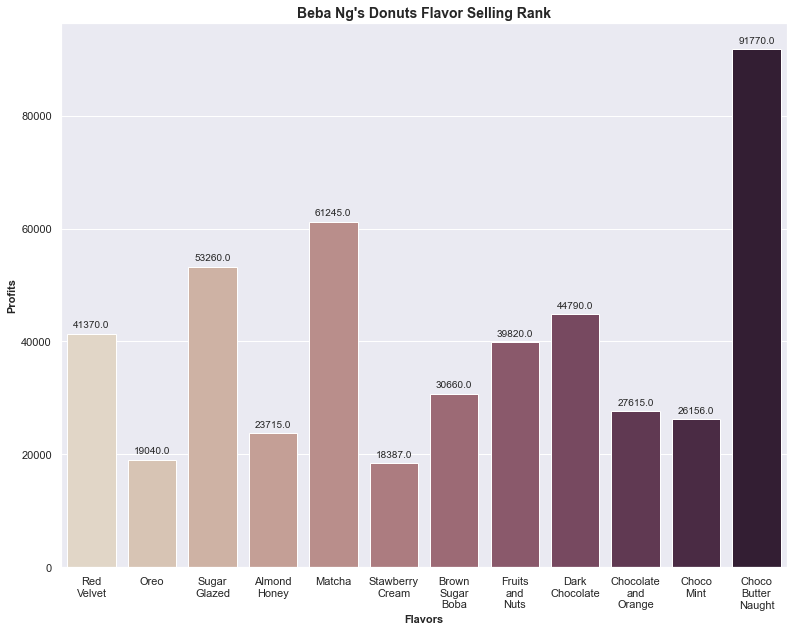

In [15]:
## Donut Flavors
flavor_labels = ['Red\nVelvet','Oreo','Sugar\nGlazed','Almond\nHoney','Matcha','Stawberry\nCream','Brown\nSugar\nBoba','Fruits\nand\nNuts','Dark\nChocolate','Chocolate\nand\nOrange','Choco\nMint','Choco\nButter\nNaught']

## Adjusting the size of the figure
fig,ax=plt.subplots(figsize=(13,10))

## Using seaborn to plot data into bargraph
flavor_rank = sns.barplot(x=flavor_labels, y=flavor_profits, palette='ch:.25', ax=ax)

## Add label to each bars based on its value
for profit in flavor_rank.patches:
    flavor_rank.annotate(format(profit.get_height(), '.1f'),
                        (profit.get_x()+profit.get_width()/2., profit.get_height()),
                         ha='center', va='center', xytext=(0,9), textcoords='offset points')

## Adding label to the plot figure and save it into .png format    
plt.xlabel('Flavors',fontsize=11,fontweight='bold')
plt.ylabel('Profits',fontsize=11,fontweight='bold')
plt.title("Beba Ng's Donuts Flavor Selling Rank",fontsize=14,fontweight='bold')
plt.savefig("Beba Ng's Donuts Flavor Selling Rank.png", dpi=300)
plt.show()

Based on the ranking results, the best 3 flavors acquired the profits `[91770 61245 23260]`, and the worst 3 flavors have the profits `[18387 19040 23715]`, according to the visual representation of the `flavor_profits`, it can be seen that the flavors `['choco butter naught' 'matcha' 'sugar glazed']` are the best 3 flavors while the flavors `['strawberry cream' 'oreo' 'almond honey']` are the worst 3 flavors.

## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [13]:
#import matplotlib.pyplot as plt
#import matplotlib
#import seaborn as sns
#sns.set()
#%matplotlib inline

#### Entire Dataset

Since `flavor_profits` are the only data being returned, I declare the function again and added the `flavor_revenue` and `flavor_costs` as data that is also returned to use in visualizing the data.

In [16]:
def flavor_sales(price, cost, sales):
    flavor_revenue = np.array([
        [sum((sales_mat[0, :])*(prices_mat[0,0]))],[sum((sales_mat[1, :])*(prices_mat[1,0]))],[sum((sales_mat[2, :])*(prices_mat[2,0]))],[sum((sales_mat[3, :])*(prices_mat[3,0]))],[sum((sales_mat[4, :])*(prices_mat[4,0]))],[sum((sales_mat[5, :])*(prices_mat[5,0]))],[sum((sales_mat[6, :])*(prices_mat[6,0]))],[sum((sales_mat[7, :])*(prices_mat[7,0]))],[sum((sales_mat[8, :])*(prices_mat[8,0]))],[sum((sales_mat[9, :])*(prices_mat[9,0]))],[sum((sales_mat[10, :])*(prices_mat[10,0]))],[sum((sales_mat[11, :])*(prices_mat[11,0]))]])
    flavor_costs = np.array([
        [sum((sales_mat[0, :])*(costs_mat[0,0]))],[sum((sales_mat[1, :])*(costs_mat[1,0]))],[sum((sales_mat[2, :])*(costs_mat[2,0]))],[sum((sales_mat[3, :])*(costs_mat[3,0]))],[sum((sales_mat[4, :])*(costs_mat[4,0]))],[sum((sales_mat[5, :])*(costs_mat[5,0]))],[sum((sales_mat[6, :])*(costs_mat[6,0]))],[sum((sales_mat[7, :])*(costs_mat[7,0]))],[sum((sales_mat[8, :])*(costs_mat[8,0]))],[sum((sales_mat[9, :])*(costs_mat[9,0]))],[sum((sales_mat[10, :])*(costs_mat[10,0]))],[sum((sales_mat[11, :])*(costs_mat[11,0]))]])

    return flavor_profits.flatten(),flavor_revenue.flatten(),flavor_costs.flatten()

flavor_revenue,flavor_costs,flavor_profits = flavor_sales(prices_mat, costs_mat, sales_mat)

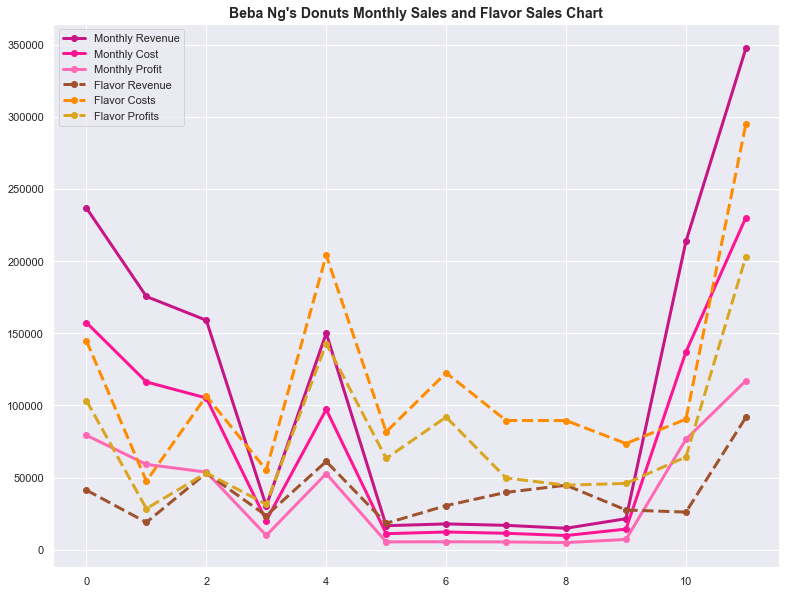

In [17]:
## Assigning size of the figure
fig,ax=plt.subplots(figsize=(13,10))

## Setting the line in the plot
plt.plot(month_rev, label='Monthly Revenue', color='mediumvioletred',  marker='o', linewidth=3)
plt.plot(month_cost, label='Monthly Cost', color='deeppink',  marker='o', linewidth=3)
plt.plot(month_profit, label='Monthly Profit', color='hotpink',  marker='o', linewidth=3)
plt.plot(flavor_revenue, label='Flavor Revenue', color='sienna', linestyle='--',  marker='o', linewidth=3)
plt.plot(flavor_costs, label='Flavor Costs', color='darkorange',linestyle='--',  marker='o', linewidth=3)
plt.plot(flavor_profits, label='Flavor Profits', color='goldenrod',linestyle='--',  marker='o', linewidth=3)

## Modifying and saving the plot as .png file
plt.title("Beba Ng's Donuts Monthly Sales and Flavor Sales Chart",fontsize=14,fontweight='bold')
plt.legend()
plt.savefig("Beba Ng's Donuts Monthly Sales and Flavor Sales Chart.png", dpi=300)
plt.show()

#### Monthly Sales

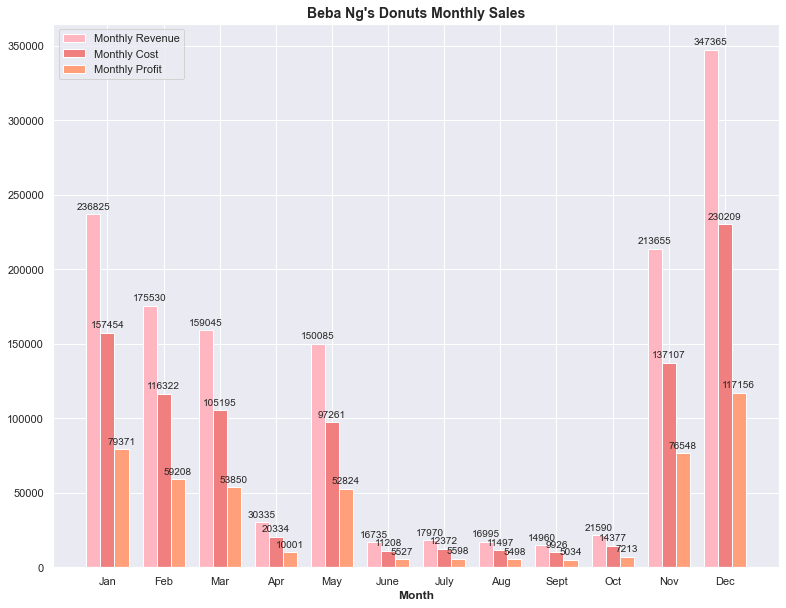

In [18]:
## Setting bar width and size of the figure
bar_width=0.25
fig,ax=plt.subplots(figsize=(13,10))

## Setting bar position in x-axis
arr_month_rev = np.arange(len(month_rev))
arr_month_cost = [x + bar_width for x in arr_month_rev]
arr_month_profit = [x + bar_width for x in arr_month_cost]

## Making bar plot
bar_month_rev = plt.bar(arr_month_rev, month_rev, color='lightpink', width=bar_width, edgecolor='white', label='Monthly Revenue')
bar_month_cost = plt.bar(arr_month_cost, month_cost, color='lightcoral', width=bar_width, edgecolor='white', label='Monthly Cost')
bar_month_profit = plt.bar(arr_month_profit, month_profit, color='lightsalmon', width=bar_width, edgecolor='white', label='Monthly Profit')

## xticks
plt.xlabel('Month', fontweight='bold')
plt.xticks([t + bar_width for t in range(len(month_rev))], ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
    ## plt.xticks() -- to position the label of the months in the plot

## Adding label to each bar
def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x()+rect.get_width()/2,height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center',va='bottom')
        
autolabel(bar_month_rev)
autolabel(bar_month_cost)
autolabel(bar_month_profit)

## Displaying the plot and save it as a .png file
plt.title("Beba Ng's Donuts Monthly Sales",fontsize=14,fontweight='bold')
plt.legend()
plt.savefig("Beba Ng's Donuts Monthly Sales.png", dpi=300)
plt.show()

#### Flavor Sales

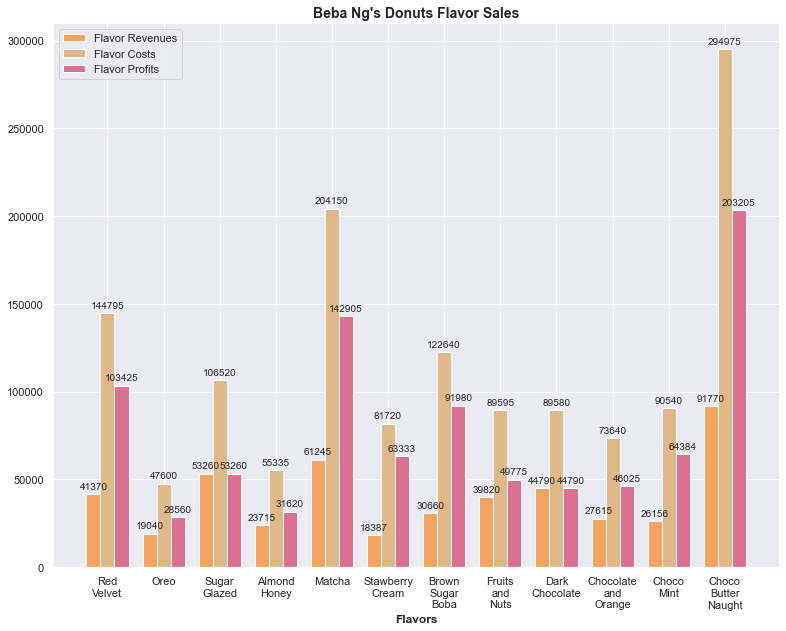

In [19]:
## Setting bar width and size of the figure
bar_width=0.25
fig,ax=plt.subplots(figsize=(13,10))

## Setting bar position in x-axis
arr_flavor_rev = np.arange(len(flavor_revenue))
arr_flavor_cost = [x + bar_width for x in arr_flavor_rev]
arr_flavor_profit = [x + bar_width for x in arr_flavor_cost]

## Making bar plot
bar_flavor_rev = plt.bar(arr_flavor_rev, flavor_revenue, color='sandybrown', width=bar_width, edgecolor='white', label='Flavor Revenues')
bar_flavor_cost = plt.bar(arr_flavor_cost, flavor_costs, color='burlywood', width=bar_width, edgecolor='white', label='Flavor Costs')
bar_flavor_profit = plt.bar(arr_flavor_profit, flavor_profits, color='palevioletred', width=bar_width, edgecolor='white', label='Flavor Profits')

## xticks
plt.xlabel('Flavors', fontweight='bold')
plt.xticks([s + bar_width for s in range(len(flavor_revenue))], ['Red\nVelvet','Oreo','Sugar\nGlazed','Almond\nHoney','Matcha','Stawberry\nCream','Brown\nSugar\nBoba','Fruits\nand\nNuts','Dark\nChocolate','Chocolate\nand\nOrange','Choco\nMint','Choco\nButter\nNaught'])
    ## plt.xticks() -- to position the label of the months in the plot

## Adding label to each bar
def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x()+rect.get_width()/2,height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center',va='bottom')
        
autolabel(bar_flavor_rev)
autolabel(bar_flavor_cost)
autolabel(bar_flavor_profit)

## Displaying the plot and save it as a .png file
plt.title("Beba Ng's Donuts Flavor Sales",fontsize=14,fontweight='bold')
plt.legend()
plt.savefig("Beba Ng's Donuts Flavor Sales.png", dpi=300)
plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

#### SUMMARY OF FINDINGS

In [20]:
monthly_sales = "monthly sales.csv"
df_ms = pd.read_csv(monthly_sales)
df_ms 

,month,revenue,cost,profit
0,january,236825,157454,79371
1,february,175530,116322,59208
2,march,159045,105195,53850
3,april,30335,20334,10001
4,may,150085,97261,52824
5,june,16735,11208,5527
6,july,17970,12372,5598
7,august,16995,11497,5498
8,september,14960,9926,5034
9,october,21590,14377,7213


The dataframe above is the findings from the first month which is the monthly sales, the dataframe has four columns, the first column is are the months, the second are the monthly revenues, the third column is for the monthly costs, and the fourth one are the monthly profits.

In [21]:
year_profits = "year profits.csv"
df_yp = pd.read_csv(year_profits)
df_yp

,flavor,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
0,profit,41370,19040,53260,23715,61245,18387,30660,39820,44790,27615,26156,91770


The data frame above are the profits obtained by each donut flavors for the whole year

In [22]:
best_flavor = "best flavor.csv"
df_bf = pd.read_csv(best_flavor)
df_bf

,flavor,profit
0,choco butter naught,91770
1,matcha,61245
2,sugar glazed,53260


The dataframe above are the best 3 donut flavors

In [23]:
worst_flavor = "worst flavor.csv"
df_wf = pd.read_csv(worst_flavor)
df_wf

,flavor,profit
0,strawberry cream,18387
1,oreo,19040
2,almond honey,23715


The dataframe above are the worst 3 donut flavors

#### RECOMMENDATIONS

Based on the data analyzation, there are months where the sales are unexpectedly low, to boost the sales, Ms. Beba Ng could have promos or discounts to those months that doesn't have much sales, like the months of June to October, may it be a back-to-school discounts for students or a "Buwan ng Wika" special for the month of Agust. Also, there are flavors that seems to not in favor with the customers tastes, since the donut flavors that doesn't have much earned profits had been specified, Ms. Beba Ng could somehow enhance the ingredients of that donut flavor, or could have a free taste samples to those donut flavors, maybe because that donut flavor could be new that's why customers doesn't buy it much, with free taste samples, customers might have a change of perspective to that donut flavor when they realized how magnificent it tastes like. 

#### REFERENCES

[1] VanderPlas, J., n.d. Visualization With Seaborn | Python Data Science Handbook. [online] Jakevdp.github.io. Available at: <https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html> [Accessed 28 November 2020].<br>
[2] Data Viz with Python and R. n.d. How To Annotate Bars In Barplot With Matplotlib In Python? - Data Viz With Python And R. [online] Available at: <https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/> [Accessed 28 November 2020].<br>
[3] Tutorialspoint.com. n.d. Matplotlib - Bar Plot - Tutorialspoint. [online] Available at: <https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm> [Accessed 28 November 2020].<br>
[4] Matplotlib.org. n.d. Matplotlib.Pyplot.Xticks — Matplotlib 3.1.2 Documentation. [online] Available at: <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html> [Accessed 28 November 2020].<br>
[5] Matplotlib.org. n.d. Grouped Bar Chart With Labels — Matplotlib 3.1.2 Documentation. [online] Available at: <https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html> [Accessed 28 November 2020].